In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
heart_data['Sex']=heart_data['Sex'].map({"M":1,"F":0})

In [5]:
heart_data["ChestPainType"] = heart_data["ChestPainType"].map({"TA":0,"ATA":1,"NAP":2,"ASY":3})

In [6]:
heart_data["RestingECG"] = heart_data["RestingECG"].map({"Normal":0,"ST":1,"LVH":2})

In [7]:
heart_data["ExerciseAngina"] = heart_data["ExerciseAngina"].map({"N":0,"Y":1})

In [8]:
heart_data["ST_Slope"] = heart_data["ST_Slope"].map({"Up":1,"Down":2,"Flat":3})

In [9]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,3,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,3,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,3,1
914,68,1,3,144,193,1,0,141,0,3.4,3,1
915,57,1,3,130,131,0,0,115,1,1.2,3,1
916,57,0,1,130,236,0,2,174,0,0.0,3,1


In [10]:
heart_data.shape


(918, 12)

In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [12]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,2.070806,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.963000,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,3.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [14]:
heart_data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

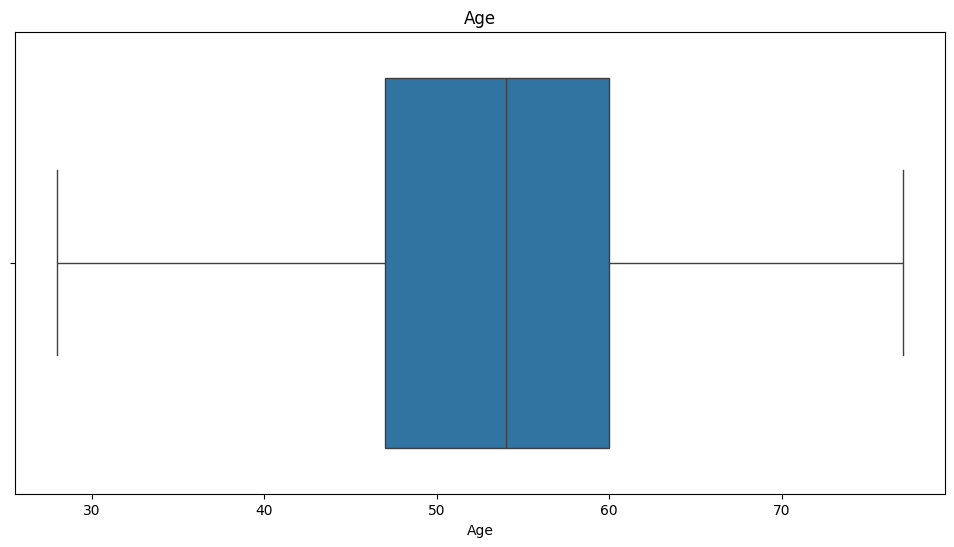

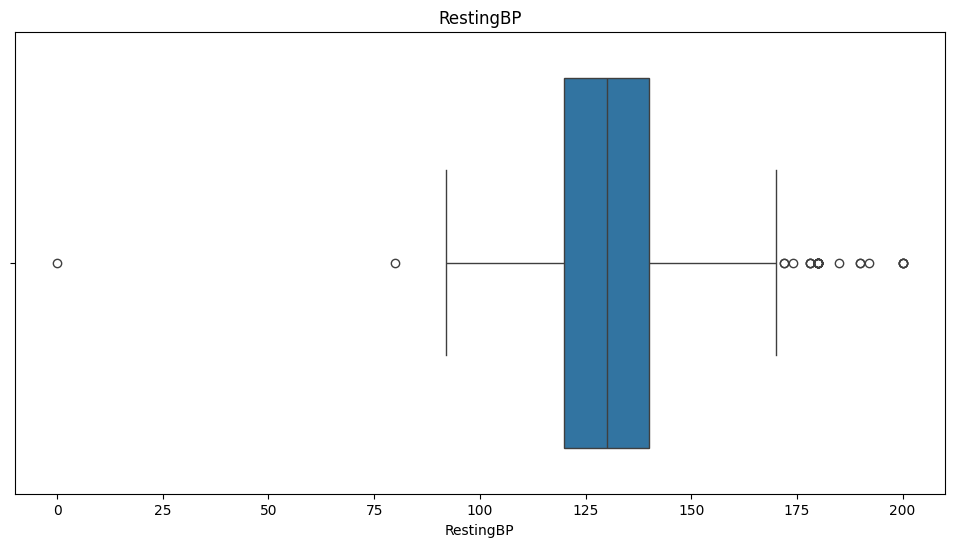

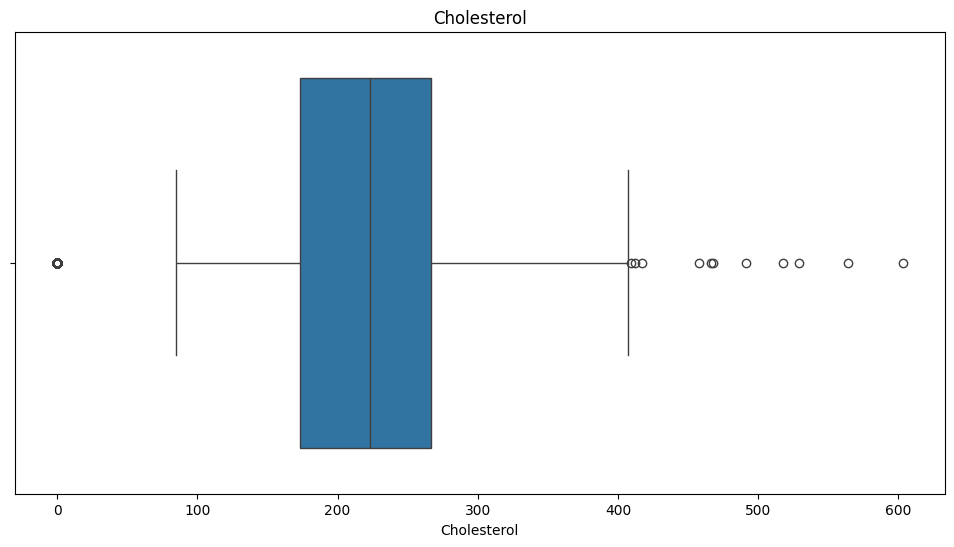

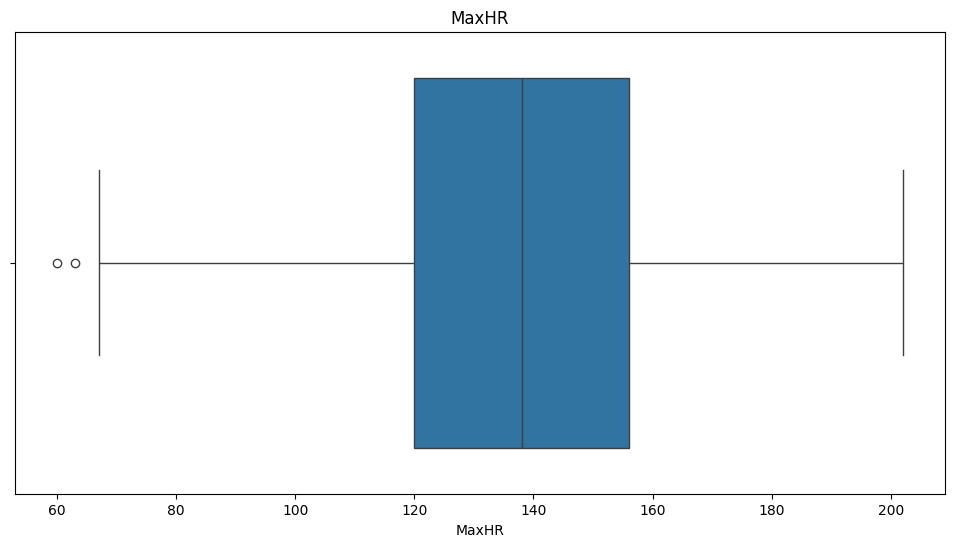

In [15]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=heart_data, x=column)
    plt.title(column)
    plt.show()

In [16]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for each numerical feature
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
outliers = {}
for column in numerical_columns:
    outliers[column] = detect_outliers_iqr(heart_data, column).shape[0]

print("Outliers detected per column:", outliers)

Outliers detected per column: {'Age': 0, 'RestingBP': 28, 'Cholesterol': 183, 'MaxHR': 2, 'Oldpeak': 16}


In [17]:
for column in numerical_columns:
    Q1 = heart_data[column].quantile(0.25)
    Q3 = heart_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    heart_data[column] = heart_data[column].clip(lower_bound, upper_bound)

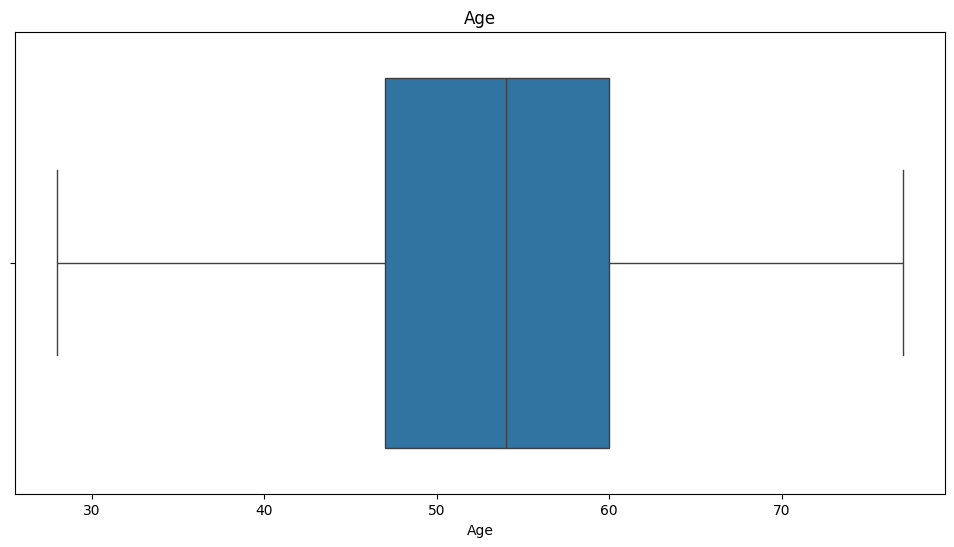

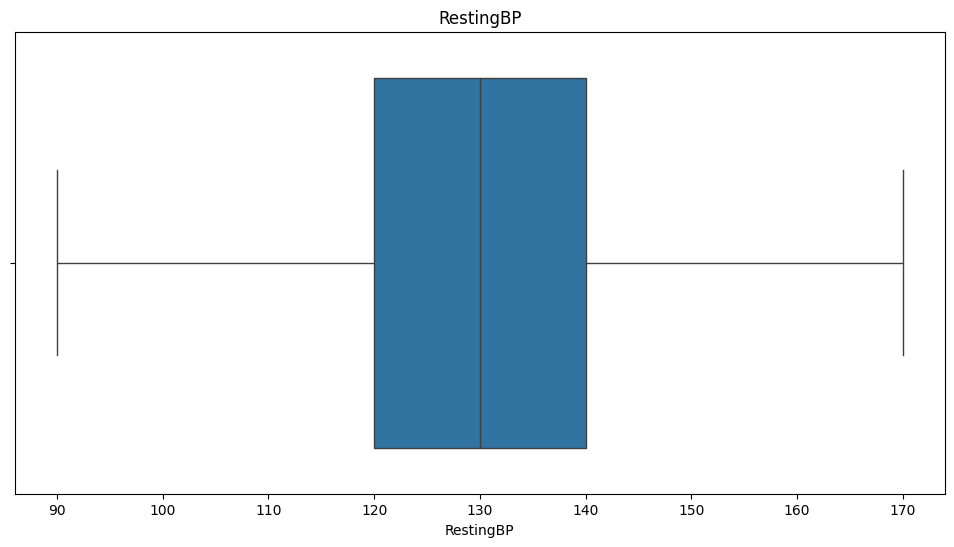

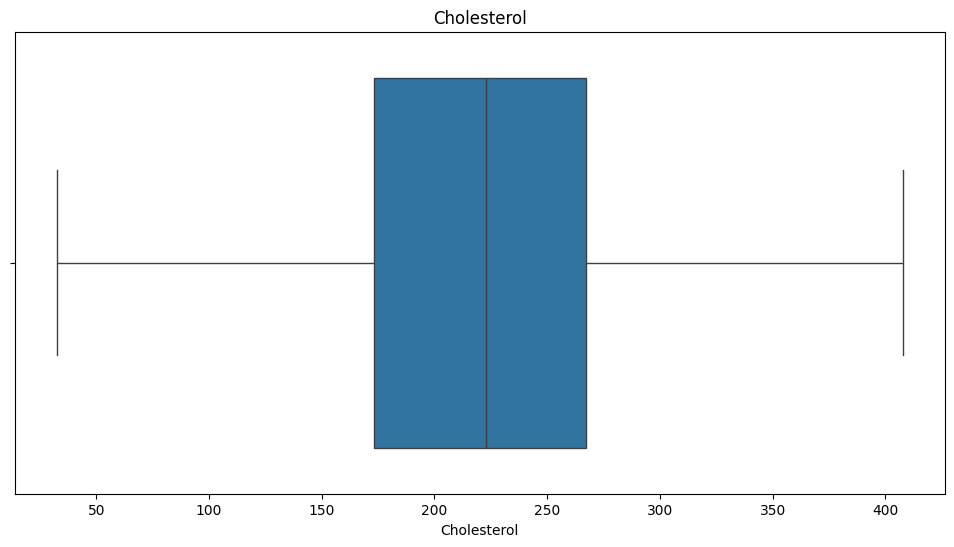

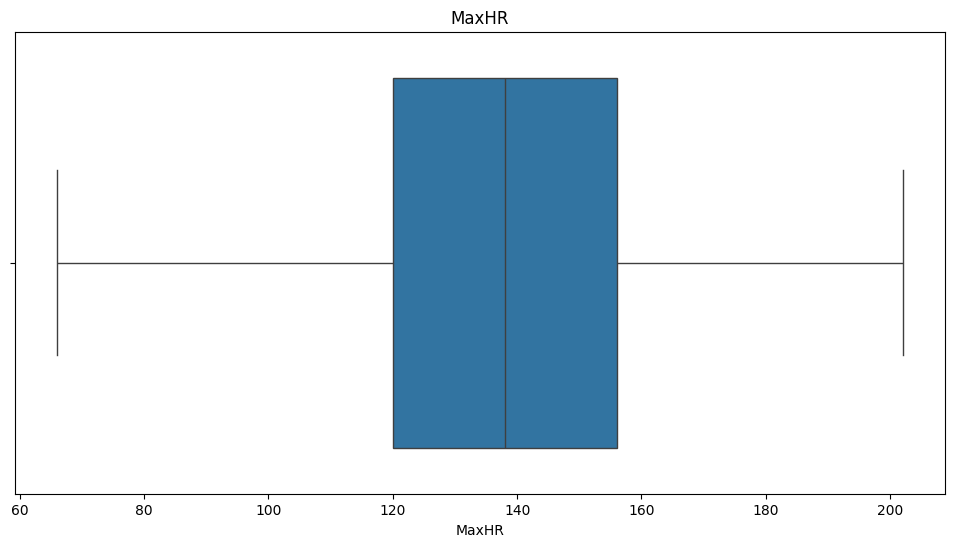

In [18]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=heart_data, x=column)
    plt.title(column)
    plt.show()

### 1----> Heart defect
### 0----> Healthy Heart

In [19]:
X = heart_data.drop(columns='HeartDisease', axis=1)
Y = heart_data['HeartDisease']

In [20]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140        289.0          0           0   
1     49    0              2        160        180.0          0           0   
2     37    1              1        130        283.0          0           1   
3     48    0              3        138        214.0          0           0   
4     54    1              2        150        195.0          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              0        110        264.0          0           0   
914   68    1              3        144        193.0          1           0   
915   57    1              3        130        131.0          0           0   
916   57    0              1        130        236.0          0           2   
917   38    1              2        138        175.0          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [21]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(X_train, Y_train)

0.8705722070844687

In [27]:
model.score(X_test, Y_test)

0.8804347826086957

In [28]:
y_pred = model.predict(X_test)

In [29]:
acc = accuracy_score(Y_test, y_pred)
print(acc)

0.8804347826086957


In [30]:
confusion_matrix(Y_test, y_pred)

array([[70, 12],
       [10, 92]])

In [31]:
input_data = (40,1,1,140,289,0,0,172,0,0.0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\ameyk\anaconda3\envs\notebook\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
